The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation


AveragePrice - the average price of a single avocado 

 type - conventional or organic 

year - the year 

Total Volume - Total number of avocados sold

Region - The city or region of the observation

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

# Data Processing

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [89]:
ava=pd.read_csv("Avacado.csv")
ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [90]:
ava.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we can observe that we have many null values in row,that are not required for our prediction thus we can remove those rows and also the Unmaned column is also having null values so we can remove that also.

# Data Cleaning

In [91]:
#Let's drop all the unnecessary rows and columns

ava.dropna(how='all',inplace=True)

In [92]:
ava.drop(['Unnamed: 0','year'],axis=1,inplace=True)

In [93]:
ava

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,Charlotte


In [94]:
ava.shape

(1517, 12)

In [95]:
ava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  region        1517 non-null   object 
dtypes: float64(9), object(3)
memory usage: 154.1+ KB


In [96]:
#here column data is in object format o lets convert into date formate
ava["Date"]=pd.to_datetime(ava["Date"])

In [97]:
#Lets extract the year and month from the Date for better visulatization
ava["Year"]=ava["Date"].dt.year
ava["Month"]=ava["Date"].dt.month
ava.Month=ava.Month.map({1:'jan',2:'feb',3:'mar',4:'april',5:'may',6:'june', 7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})
ava['Day']=ava['Date'].dt.day

In [98]:
ava.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'Year', 'Month', 'Day'],
      dtype='object')

In [99]:
ava.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,december,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,december,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,december,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,june,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,november,29


In [100]:
columns_names=(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'region', 'Year', 'Month', 'Day'])
columns_names

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'region',
 'Year',
 'Month',
 'Day']

In [101]:
#Let's Rearrange the columns in our data set for better presenation

columns_names[0],columns_names[1],columns_names[2],columns_names[3],columns_names[4],columns_names[5],columns_names[6],columns_names[7],columns_names[8],columns_names[9],columns_names[10],columns_names[11],columns_names[12],columns_names[13]=columns_names[0],columns_names[13],columns_names[12],columns_names[11],columns_names[1],columns_names[2],columns_names[3],columns_names[4],columns_names[5],columns_names[6],columns_names[7],columns_names[8],columns_names[9],columns_names[10]
columns_names

['Date',
 'Day',
 'Month',
 'Year',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'region']

We have successfully splitted and rearranged the columns as per our requirement

In [102]:
ava=ava[columns_names]

In [103]:
ava.head()

,Date,Day,Month,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
0,2015-12-27,27,december,2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany
1,2015-12-20,20,december,2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany
2,2015-12-13,13,december,2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany
3,2015-06-12,12,june,2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany
4,2015-11-29,29,november,2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany


In [116]:
ava['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
GreatLakes             18
Midsouth               18
DallasFtWorth          17
Roanoke                17
MiamiFtLaude

In [118]:
ava['Year'].value_counts()

2015    1270
2016     247
Name: Year, dtype: int64

In [104]:
#Let's drop the date column

ava.drop(['Date'],axis=1,inplace=True)

In [107]:
ava.describe()

,Day,Year,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,1517.000000,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000
mean,15.253790,2015.162821,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074
std,8.965902,0.369324,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144
min,1.000000,2015.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000
25%,7.000000,2015.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000
50%,15.000000,2015.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000
75%,22.000000,2015.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000
max,31.000000,2016.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000


In [109]:
#Let's check for null values in the data set
ava.isnull().sum()

Day             0
Month           0
Year            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
dtype: int64

no columns contains null values

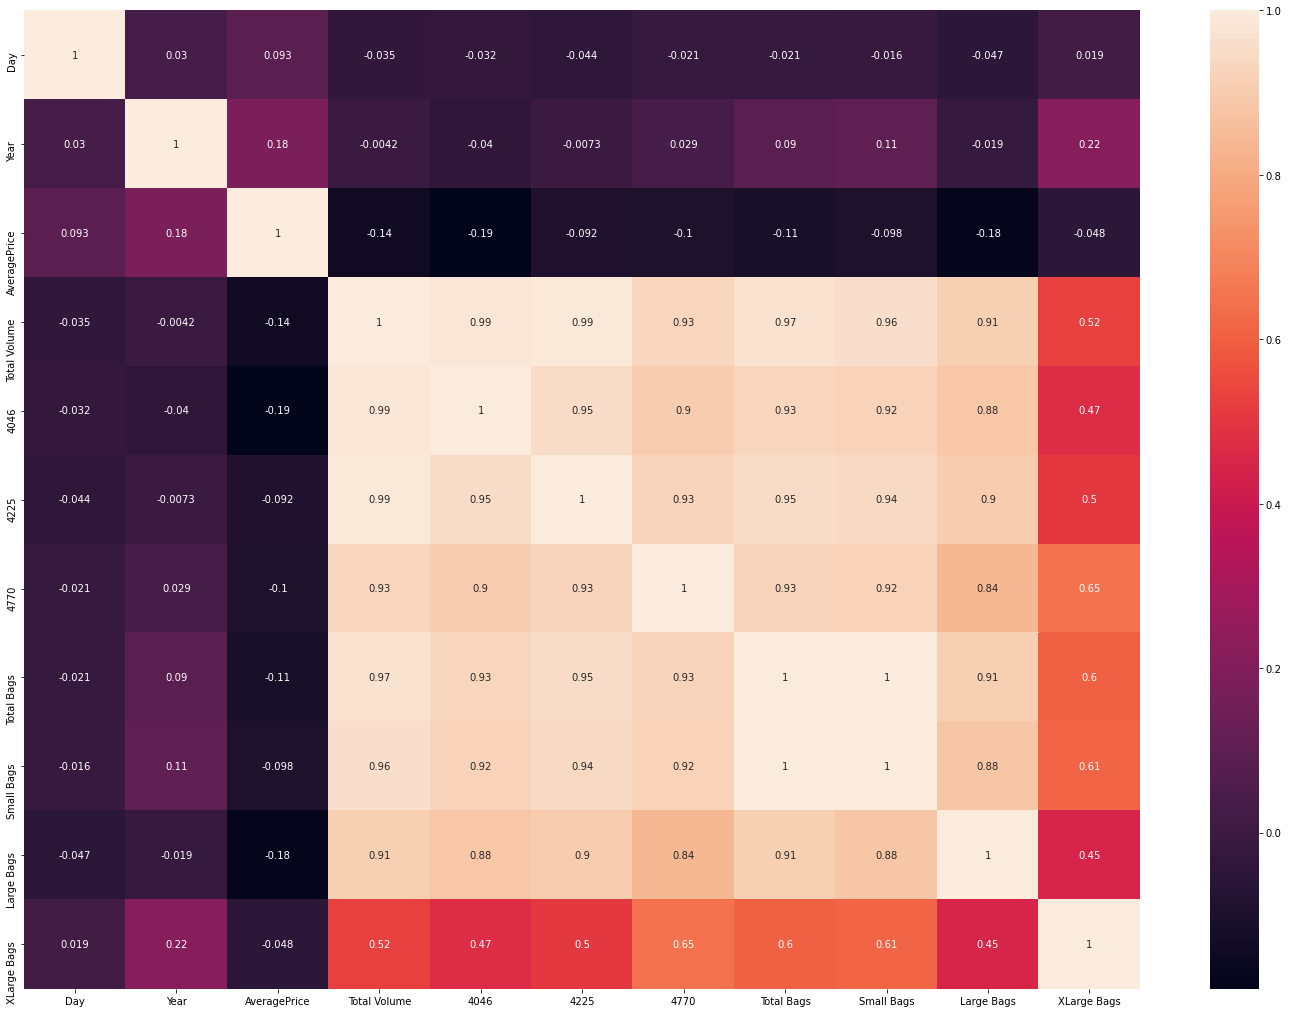

In [113]:
#Let's check the heat map of correlation

plt.figure(figsize=(25,18))

sns.heatmap(ava.corr(),annot=True)

Total volume, Small bags and and total bags are higly
    correlated

 Average price and Large, Small bags are higly negative
   correlated

 Xlarge bags and region are negatively correlated

# Exploratory Data Analysis

Text(0.5, 1.0, 'Average Price by Month')

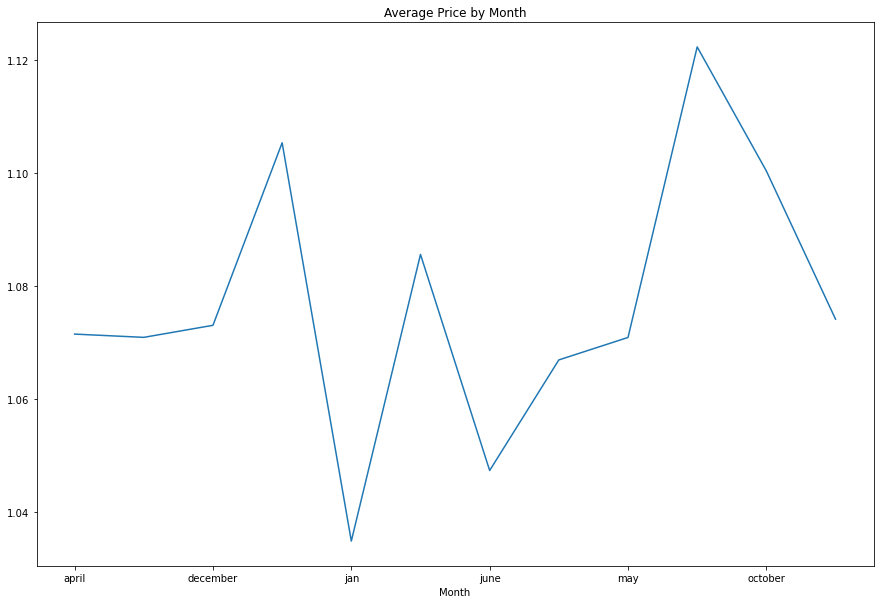

In [128]:
#Let's check the average price with repect to the month
dategroup=ava.groupby("Month").mean()
plt.figure(figsize=(15,10))
dategroup['AveragePrice'].plot(x=ava.Month)
plt.title('Average Price by Month')

We can observe fron the graph that in the april month there is drop in the avg price of avacado and the then it keep on increasing and decreasing. From july we can observe there is stedy increase in the avg price then again it drops september.

Text(0.5, 1.0, 'Average Price by year')

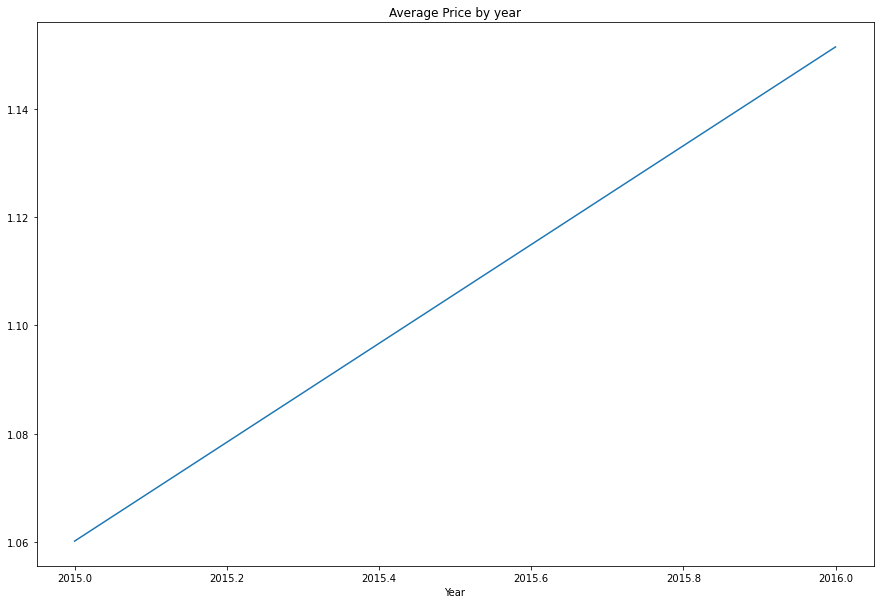

In [129]:
dategroup=ava.groupby("Year").mean()
plt.figure(figsize=(15,10))
dategroup['AveragePrice'].plot(x=ava.Year)
plt.title('Average Price by year')

We can observe the avg price has a increased through the years

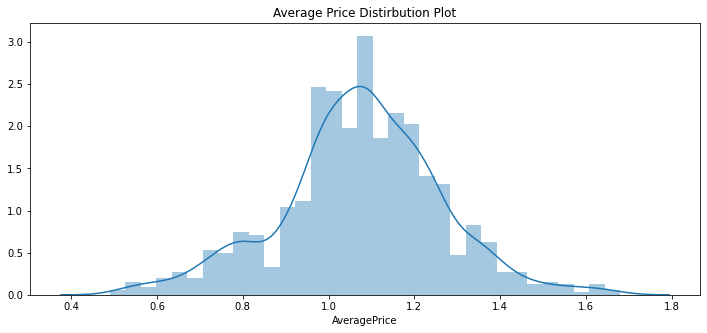

In [131]:
#Let's cehck the average price distribution

plt.figure(figsize=(12,5))
plt.title("Average Price Distirbution Plot")
sns.distplot(ava["AveragePrice"])

avg price has a normal distribution

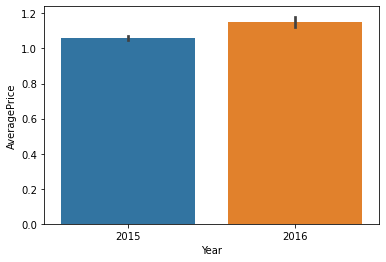

In [132]:
#Let's check the ratio of avg price and year

sns.barplot(x = "Year" , y = "AveragePrice" ,data=ava )

avg price in 2016 has increased as compared to the year 2015

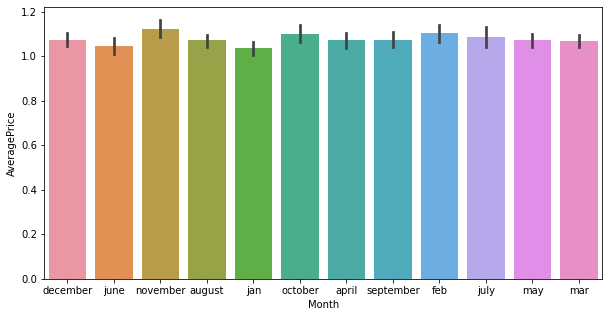

In [135]:
#Let's check the  ratio of month and price that which year had max average price
plt.figure(figsize=(10,5))
sns.barplot(x = "Month" , y = "AveragePrice" ,data=ava )

We can observe that in the november month we hae the highest average price, then followed by october, feburary, july, december and so on

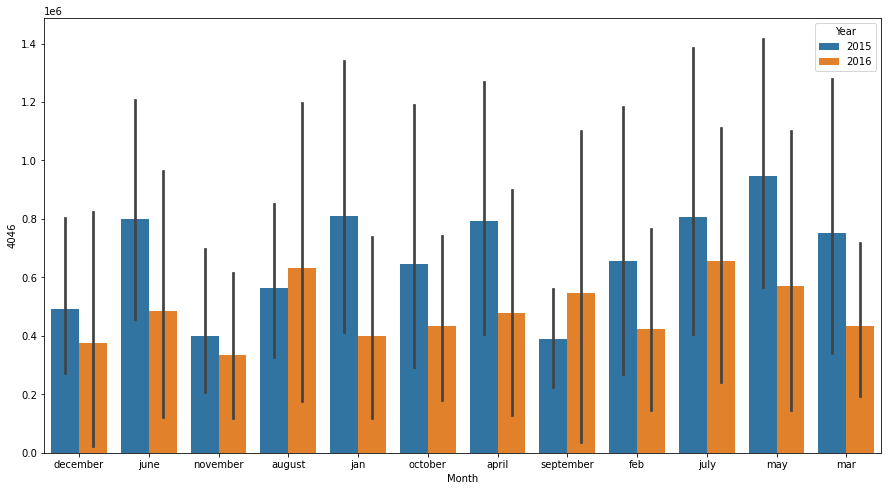

In [137]:
#Let's check the average price for 4046 
plt.subplots(figsize = (15,8))
sns.barplot(x = ava['Month'], y= ava['4046'],hue=ava['Year'])

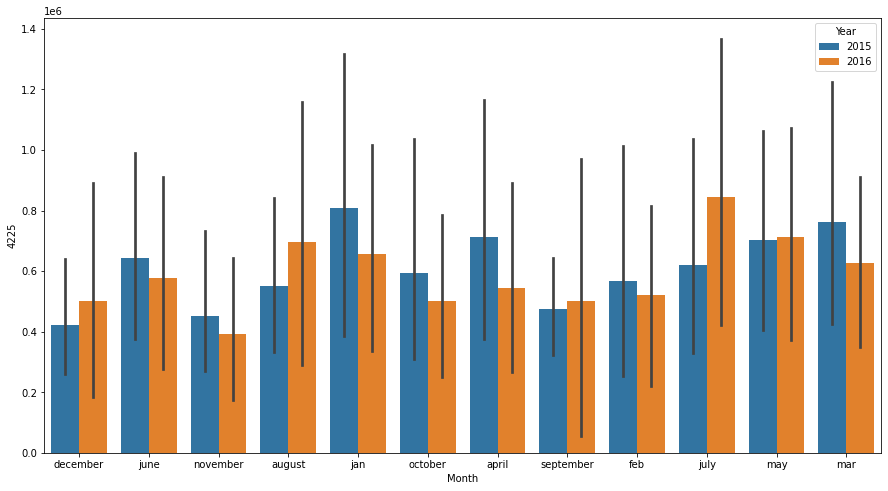

In [138]:
#Let's check the average price for 4225
plt.subplots(figsize = (15,8))
sns.barplot(x = ava['Month'], y= ava['4225'],hue=ava['Year'])

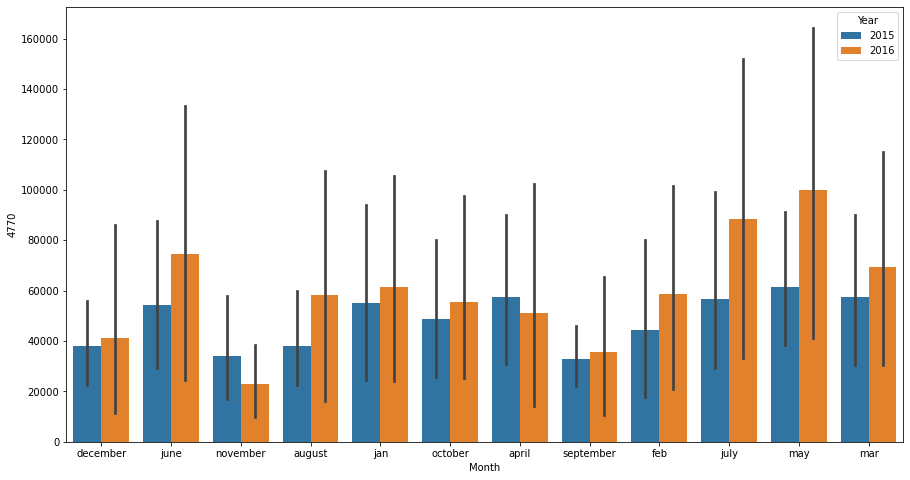

In [139]:
#Let's check the average price for 4770
plt.subplots(figsize = (15,8))
sns.barplot(x = ava['Month'], y= ava['4770'],hue=ava['Year'])

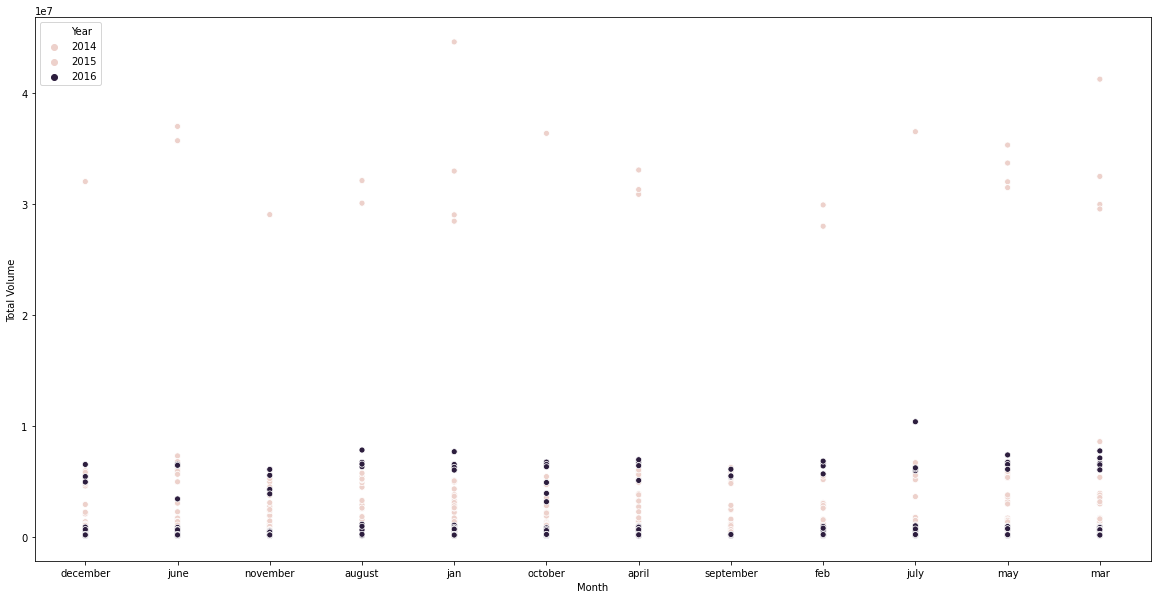

In [142]:
plt.subplots(figsize = (20,10))
sns.scatterplot(x=ava['Month'],y=ava['Total Volume'],hue=ava['Year'])

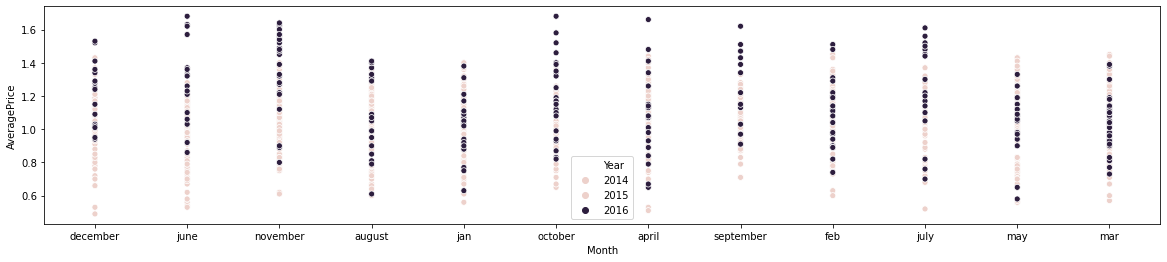

In [144]:
plt.subplots(figsize = (20,4))
sns.scatterplot(x=ava['Month'],y=ava['AveragePrice'],hue=ava['Year']);


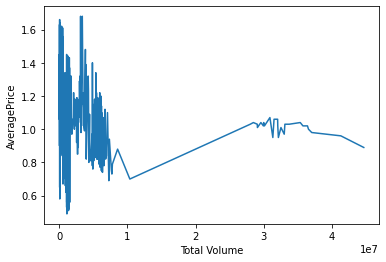

In [146]:
sns.lineplot(ava['Total Volume'],ava['AveragePrice'])

We can observe that with increase in volume the average price is decreased

Text(0.5, 1.0, 'Avg Price in each region')

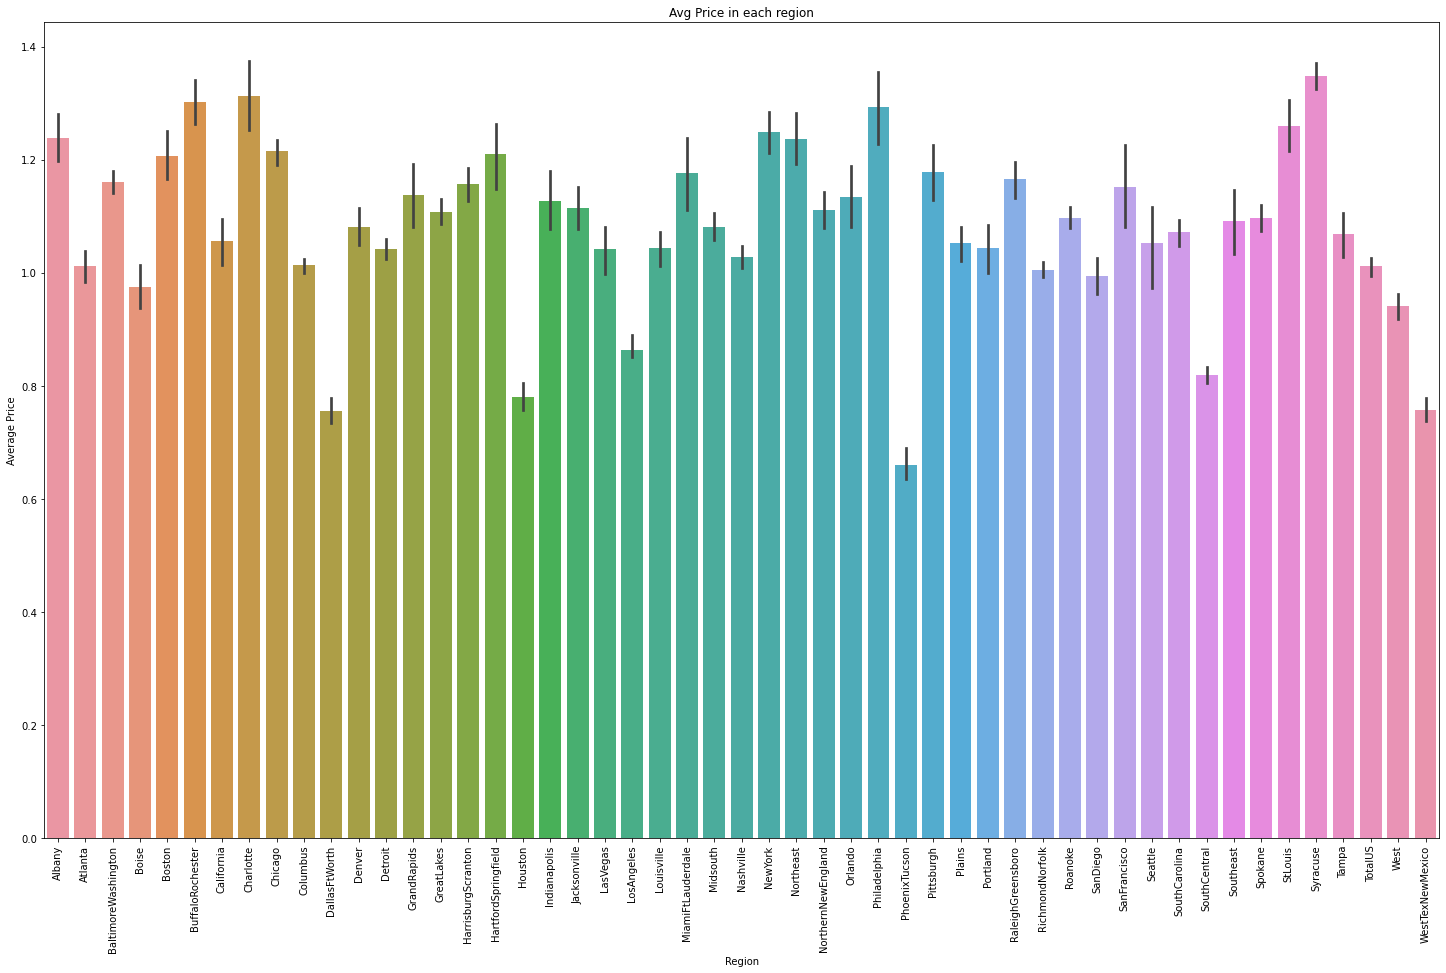

In [149]:
#Let's check the  avg price in each region

plt.figure(figsize=(25,15))
sns.barplot(x='region',y='AveragePrice',data=ava)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Avg Price in each region')

We can observe that syracuse has the highest avg price, followed by Philadephia, St. Louis, New Yok and Norht East

# Plotting Outliers

Day                 AxesSubplot(0.125,0.71587;0.133621x0.16413)
Year             AxesSubplot(0.285345,0.71587;0.133621x0.16413)
AveragePrice      AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4046             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
4225               AxesSubplot(0.125,0.518913;0.133621x0.16413)
4770            AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Total Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Large Bags      AxesSubplot(0.766379,0.518913;0.133621x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

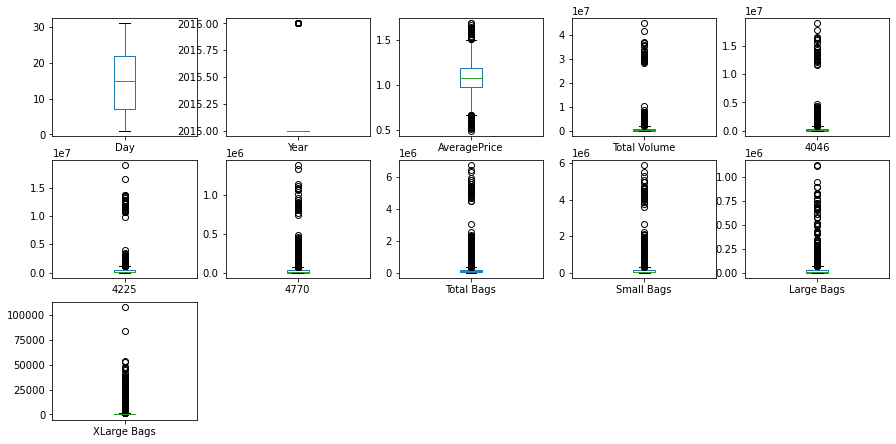

In [154]:

#Let's plot the boxplot of each column to check the outliers 

ava.plot(kind='box',subplots = True,layout=(4,5),figsize = (15,10))

# Data Prepreation for Model

In [156]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ava["Month"] =le.fit_transform(ava["Month"])


In [157]:
ava["region"] =le.fit_transform(ava["region"])

In [158]:
from scipy.stats import zscore
z=np.abs(zscore(ava))
z

array([[1.31052998, 0.98617371, 0.44100815, ..., 0.36004386, 0.29272731,
        1.3143384 ],
       [0.52953678, 0.98617371, 0.44100815, ..., 0.36000798, 0.29272731,
        1.3143384 ],
       [0.25145642, 0.98617371, 0.44100815, ..., 0.35996017, 0.29272731,
        1.3143384 ],
       ...,
       [0.58616779, 0.68957864, 2.26753179, ..., 0.29095317, 0.1820374 ,
        0.88028586],
       [1.08738906, 1.68318189, 2.26753179, ..., 0.29078309, 0.29272731,
        0.88028586],
       [0.30639586, 1.68318189, 2.26753179, ..., 0.26226571, 0.29272731,
        0.88028586]])

In [160]:
avacado=ava[(z<3).all(axis=1)]
print(avacado.shape)
print(ava.shape)


(1436, 13)
(1517, 13)


In [161]:
percentage_ofouliers=((1517-1436)/1517)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

using z score percentage of outlier removed: 5.339485827290705


In [188]:
#Let's assign the value of x and y for training and testing

X = avacado.drop(['AveragePrice'],axis=1)
y = avacado['AveragePrice']

In [189]:
X.skew()

Day             0.041849
Month          -0.016383
Year            2.004439
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
region          0.276276
dtype: float64

In [190]:
from sklearn.preprocessing import power_transform
X=power_transform(x,method=("yeo-johnson"))


In [191]:
X=pd.DataFrame(x,columns=['Day','Month','Year','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','region'],
      dtype='object')
X.skew()

Day            -0.212755
Month          -0.226032
Year            2.004439
Total Volume    0.000000
4046           -0.025799
4225            0.000835
4770           -0.054751
Total Bags     -0.000866
Small Bags      0.013734
Large Bags     -0.118018
XLarge Bags     0.479994
region         -0.219708
dtype: float64

In [175]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(avacado))

StandardScaler()


# Modelling

In [182]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [183]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [192]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [193]:
model_select(KNeighborsRegressor)

Max score is 0.7002020922468526 with random state 63


In [194]:
model_select(LinearRegression)

Max score is 0.4144337384877308 with random state 73


In [196]:
model_select(Ridge)

Max score is 0.4119021338063734 with random state 73


In [198]:
model_select(SVR)

Max score is 0.7496750939934038 with random state 101


In [199]:
model_select(DecisionTreeRegressor)

Max score is 0.7225629626305745 with random state 76


In [200]:
model_select(RandomForestRegressor)

Max score is 0.8399405424568491 with random state 86


In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=86)

In [202]:
cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()

0.7420463446773361

In [205]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
print(rf.score(X_train, y_train))

0.9668876287003206


In [206]:
predict=rf.predict(X_test)

predict=pd.DataFrame((predict))
predict

,0
0,0.9485
1,0.8724
2,1.2589
3,1.1700
4,1.0746
...,...
469,1.4622
470,0.7902
471,1.1053
472,1.1141


In [207]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 0.8362397825120225
Mean absolute error is 0.06168755274261605
Mean squared error is 0.006443376940928274


In [208]:
#Let's look at parameters used by our current RandomForestRegressor

rf = RandomForestRegressor()
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [209]:
#Let's hype tune our model with GridSearchCV

from sklearn.model_selection import GridSearchCV
parameters = {'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 10, 20, 30, 50],
             }
grid = GridSearchCV(estimator=rf,param_grid=parameters,
                    cv = 3, verbose=2, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)


Fitting 3 folds for each of 900 candidates, totalling 2700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 860 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:   37.1s


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 10, 20, 30, 50]},
             verbose=2)
0.7856562687034847
50
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 2700 out of 2700 | elapsed:   47.4s finished


In [210]:
#Let's re-train the regressor model with the best parameters

rf = RandomForestRegressor(min_samples_leaf = 1, min_samples_split= 2,
                            max_features = 'sqrt', n_estimators = 50)
rf.fit(X_train,y_train)
print("Score=",rf.score(X_train,y_train))
predrfc = rf.predict(X_test)
print('*******************************************************************')
print('Mean Absolute Error= ', mean_absolute_error(y_test,predrfc))
print('Mean squared Error= ', mean_squared_error(y_test,predrfc))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predrfc)))
print('*******************************************************************')
print('R2 Score=',r2_score(y_test,predrfc))

Score= 0.9691060332774747
*******************************************************************
Mean Absolute Error=  0.06228270042194092
Mean squared Error=  0.006342035611814344
Root Mean Absolute Error=  0.24956502243291412
*******************************************************************
R2 Score= 0.8388154005844035


Text(0, 0.5, 'Predicted_Y')

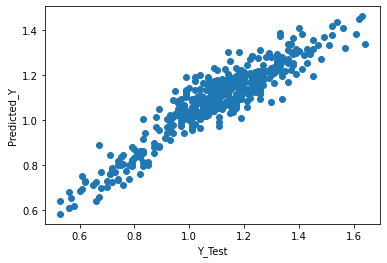

In [211]:
#checking the diff between actual and predicted value using graph

plt.scatter(x=y_test,y=predrfc)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

# Random Forest Regressor has the highest R2 score ie around 84%

# For Regression problem we got the best result from Random Forest with and accuracy of 83.88%

# Classification Model

Now we are taking region as indepependent variable and predicting using classificaton method

In [213]:
#Let's assign the value of x and y for training and testing phase

x_c = avacado.drop(columns=['region','Day','Total Bags'])
y_c = avacado[["region"]]
print(x_c.shape)
print(y_c.shape)

(1436, 10)
(1436, 1)


In [214]:
# Let's scale the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_c)
x_c = pd.DataFrame(x_c,columns=x_c.columns)

In [215]:
from sklearn.model_selection import train_test_split
xc_train,xc_test,yc_train,yc_test=train_test_split(x_c,y_c,test_size=0.2,random_state=0)

In [216]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(yc_test, yc_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(yc_test, yc_predict)) 
    
    print("\nClassification Report: \n", 
    classification_report(yc_test, yc_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(yc_test,yc_predict)*100:0.2f}%")

In [217]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {log.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {log.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 41.81%
Accuracy of Test Dataset: 35.07%


In [218]:
y_predict=log.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[26 14 12 47 11 49  6 27 17 14 43 14  6  6  6  4 26  2 17 27 50  6 43 12
  5  4 14 34 26 40 17  5 28  6 14 11 31  8 31 39 31 31 13 43 47  2 40  2
  7  2  4 26 47 47 17 31 11 31  6 43  6  5 17 17  5 12 12  7 50 17 13  5
  8  6 12  9 33 33  2 50 50 43  6  9  9 28 15  1 49  5 47 42 43  9 12 11
 28 42  8 33 47 26  1 43 49  4 50 28 43 42 12 50  6  4 42 41 26 11 31 49
 43 26 31 26 50 50 47 42 27 42  2 47 26 33  5 42 12  8  6  9  4 34 34  6
 27  4  1 17 28 14 17  2 27  4 26 26 39  2  6  5  4  4  5 28 15  6 43 28
  6 28 17 26  6 42 27 14 31 43 50 31 42 26 47 28 17  6  6 28 26  5  6  5
  6 50  6  5 43 17 27  6  6 14 11 43 43 47 43 47 31 14 12 49 42 50  6 26
 26 31  2 11 47 33  1  5 17 15 26  2 42 28 47 11 17 26 49 47  5 49  4  9
 17 26  6 34 43 50 11 26 14 47  4 43 42  7 24  2 14 23  6 24  2 33  9 28
 28  6 43 50 28  6  9 31 43 47  6 50 26 28 47 12 24 43 42 42 43 47 11  6]

Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 3 2 0]
 [0 0 7 ... 0 0 0]
 ...
 [0 0 0 ... 2 1 0]
 [0

In [219]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
tree.fit(xc_train, yc_train)
print(f"Accuracy of Train Dataset: {tree.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {tree.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 23.26%
Accuracy of Test Dataset: 25.35%


In [220]:
y_predict=tree.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[ 2  2  2  3  0  2 44  0  2  0  2  2  2  2 44  0  0  2  2  0  2 44 19  2
  0  4  0  2  2  2  2  0  0 44  2  2  2  2  2  2  2  2  0  2  2  2  2  2
  2  2  4  2  2  2  2 44  2  2  2  2 44  0  2  2  2  2  2  2  3  2  0  0
  2 44  2  2  2  2  4  2  2 25 44  2  2  0  2 19  2  0  2  2  2  2  3  0
  0  2  2  2 19  0 19  2  2  0  3  4  2  2  2  2  2  4  2  2  0  2  2  2
  2  2  2  4  2  3  3  2  2  2  2  2  0  2  0  2  2  2  2  2  0  2  2  2
  2  4 19  2  0  0  2  2  2  4  0  0  2  2 44  0  4  4  2  0  2 44  2  4
  2  0  2  0  2  2  0  2  2  2  3  2  2  0  3  0  2  2  2  0  0  0  2  0
  2  2  2  0  2  2  0 44  2  0  2  2  2  2  2  2  2  2  2  2  2  2 44  0
  0  2  2  2  2  2  2  0  2  2  0  2  2  2  2  0  2  0  2  2  0  2  4  2
  2  2 44  2  2  2  0  2  0  3  4 25  2  2  2  4  0  2  2  2  2  2  2  4
  0  2  2 25  0  2  2  2 19  2  2  3  0  0  3  2  2 25  2  2 19  2  2 44]

Confusion Matrix: 
 [[19  0  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0

In [221]:
from sklearn import svm
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {svm_rbf.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {svm_rbf.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 33.36%
Accuracy of Test Dataset: 29.86%


In [222]:
y_predict=svm_rbf.predict(xc_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:
[26 14 12  3  3 42  3  3 31  3 43  3  3  3  3  3  0  4 31  3  1  3  3  3
  3  4  3  3 27 12 31  3  3  3 14  2 31  2 31  2  1 31  3  1  3  2  4 26
  3  2  4  2  1 12 49  3  2 31  6 12  3  3  1 42  3 12  3  3  3 31  3  3
  2  3  3  3  3  3  4  1 31  3  3  3  3  0  0  3 49  3  1  6  1  3  3  3
  3  1  2  3  3  3  3  1 49  3  3  4  1 31  3 31 12  4 31 12  3  2 31  1
  1 26 31  4 31  3  3  1 27 31  2  1  3 42  3 31 12  2 12  3  3 12  6  6
 26  4  3 31  0  3 17  2 26  4  0  3  2  4  3  3  4  4  2  3  3  3  1  4
 12  3 49  3 42  6  3 14 31  1  3 31 42  3  3  3 31  1  3  3  3  3 12  3
  6 43 12  3  1 49  3  3  3  3  4  1  1 12  1  3 31 14  3  1  1 31  3  3
  3 43  2  2  3  3 31  3 31  3  3  2  6  4  1  3  1  3  3 12  3 49  2  3
 31 26  3 12  1 31  3 26  3  3  2  3  6  3 24  4  3 12  3 14  4  3  3  4
  3  3  1  3  3  3  3 31  3  3 42  3  3  3  3 12 24  3  6 42  3 12  2  3]

Confusion Matrix: 
 [[ 0  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0

In [223]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100)
forest.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {forest.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {forest.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 98.26%


In [224]:
y_predict=forest.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[26 14 12  3 18 42 44  0 17 18 43 18 20 37 44  0 16  4 10  5 45 44 19  7
  5  4 13 44 27 34 17  5  0 44 14 11 31  8 31 39 38 31 32  1 19  2 40  2
  7  2  4 26  1 47 42  3 11 31  6 23 44 46 38  6 15 12  7  7  3 17 32 13
  8 44  7  9 37 45  4 50 50 25 44  9  9 16 15 19 49  5  1 42  1  9  3 22
  0 31  8 45  3 18 19 29 42  0  3  4 29 33 12 50 34  4 10 41 32 11 31  1
  1 26 10 16 50  3  3 38 27 17  2 41 22 42  5 17 12  8 34  9  0 40  6  6
 26  4 19 10 16 22 17  8 26  4 16  0 39 30 44  5  4  4 34  0 15 44 47 28
 34  0 42 22 42 49  0 14 31 23  3 31 42 32  3  0 10 38 36  0  0 46 38  5
  6 21 38  5  1 49  5 44 35 22 11  1 23 47 23 19 31 24  7  1 38 50 44  0
  0 21  2 11 47 45 23  5 10 15 32  2  6 30  1 22 38  0 47 41  5 49  4  9
 17 26 44 40  1 50 22 26 18  3  4 25  6 35 24  4 32  1 36 14  2 37  9  4
  0 37  1 25  0 36  9 31 19 19  6  3  0  0  3 12 24 25 42 42 19 41 11 44]

Confusion Matrix: 
 [[19  0  0 ...  0  0  0]
 [ 0 13  0 ...  1  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 

In [225]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)
gbc.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {gbc.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {gbc.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 100.00%
Accuracy of Test Dataset: 92.71%


In [226]:
y_predict=gbc.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[26 14 12  3 18 42 44  0 17 18 43  9 20 37 44  0 13  4 10  5 45 44 19  7
  5  4 13 50 27 34 17  5  0 44 14 11 31  8 31 39 38 31 32  1 19  2 40  2
  7  2  4 26  1 23 42 44 11 31  6 23 44 46 38 27 15 12  7  7  3 17 32 13
  8 44  7  9 15 45  4 50 50 25 44  9  9 16 15 19 49  5  1 42  1  9  3 22
  0 31  8 45  3 18 19 29 42  0  3  4  1 33 12 50 34  4 10 41  0 11 31  1
  1 26 10 29 50  3  3 38 27 17  2 41 22 42  5 17 12  8 34  9  0 40  6  6
 30  4 19 10 16 22 31  8 26  4 16  0 39 30 44  5  4  4 34  0 15 44  1 28
 34  0 42 22 42 38  5 14 31 23  3 31 42 32  3  0 10 38 36  0  0  0 38  5
 10 31 38  5  1 27  5 44 35 22 11  1 23 47  1 19 31 24  7 47 38 50 44  0
  0 50  2 11 47 45 23  5 10 15 32  2  6  2  1 22 38  0 47 41  5 49  4  9
 17 26 44 40  1 50 22 26 18  3  4 25  6 35 24  4 19  1 36 14  2 37  9  4
  0 37  1 25  0 36  9 31 19 19  6  3  0  0  3 12 24 25 42 42 19 41 11 44]

Confusion Matrix: 
 [[19  0  0 ...  0  0  0]
 [ 0 14  0 ...  1  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 

In [227]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xc_train,yc_train)
print(f"Accuracy of Train Dataset: {knn.score(xc_train,yc_train)*100:0.2f}%")
print(f"Accuracy of Test Dataset: {knn.score(xc_test,yc_test)*100:0.2f}%")

Accuracy of Train Dataset: 88.15%
Accuracy of Test Dataset: 80.90%


In [228]:
y_predict=knn.predict(xc_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(yc_test, y_predict)

Predicted values:

[26 14 12  3 18 42 44  5 17 18 43 18 20 37 44  0 16  2 17  0 41 44 19  7
  5  4 13  5 27 34 17  5  0 44 14 11 31  8 31 39 38 31 32  1 19  2 34 26
  7  2  4 26  1 23 49  3 39 31 49 23 44 46 38 42 15 12  7  7  3 33 32 13
  8 44  7  9 37 45  4 50 50 29 44  9  9 16 15 19 49  5  1  6  1  9  3 22
  0 31  8 45  3 18 19 47 42  0  3 28  1 33 12 50 34  4 10 41 22 11 31  1
  1 26 31 28 50  3  3 38 27 17  2 41 22 42  5 10 12  8 34  9  0 34  6  6
 26  4 19 17 16 22 17  8 26 28 16  0 39 30 44  5 28  4  2  0 15 44 23  4
 34  0 42 22 42 49  0 14 31  1  3 31 42 22  3  0 33 38 36  0  0 46 38  5
  6 43 34  5 23 49  0 44 35 32 11 23  1 47  1 19 31 14  7 47 38 50 44  0
  0 43  2 11 47 45 50  5 17 15 22  2 42  4  1 22 38  0 47 41  5 49  4  9
 17 26 44 34  1 31 22 26 18  3  4 25  6 35 24  4 32  1 36 14  4 37  9  4
  0 37  1 25  0 36  9 31 19 19  6  3  0  0  3 12 24 19 42 42 19 41 11 44]

Confusion Matrix: 
 [[18  0  0 ...  0  0  0]
 [ 0 11  0 ...  1  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 

In [229]:
#Let's check the cross validate for our models

from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=42)
models=[('Logistic Regression', log), ('Support Vector Machine (rbf)', svm_rbf),('Decision Tree',tree),
        ('Random Forest',forest),('GradientBoostingClassifier', gbc),('KNeighborsClassifier', knn)]

for model in models:
    results=model_selection.cross_val_score(model[1],xc_train,yc_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean()*100:.2f}%")

Cross validated Accuracy of Logistic Regression: 39.02%
Cross validated Accuracy of Support Vector Machine (rbf): 30.75%
Cross validated Accuracy of Decision Tree: 22.47%
Cross validated Accuracy of Random Forest: 95.99%
Cross validated Accuracy of GradientBoostingClassifier: 88.68%
Cross validated Accuracy of KNeighborsClassifier: 80.92%


In [231]:
from sklearn.metrics import roc_curve, roc_auc_score
classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree,
    'Support Vector Machine (rbf)': svm_rbf,
    'Random Forest':forest,
    'GradientBoostingClassifier':gbc    
    
}

regression_models = {
    'LogisticRegression': log
}

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}: {}'.format(name, accuracy_score(yc_test, y_pred)*100))

KNeighboursClassfier: 59.72222222222222
DecisionTreeClassifier: 25.34722222222222
Support Vector Machine (rbf): 47.56944444444444
Random Forest: 97.22222222222221
GradientBoostingClassifier: 92.01388888888889


In [233]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(xc_train, yc_train)
    y_pred = pipeline.predict(xc_test)
    
    print('{}\t{}'.format(name, accuracy_score(yc_test, y_pred)))

LogisticRegression	0.59375


# We can say that Random Forest is the best model with around 97% Accuracy

In [234]:
#Let's save the best model
import joblib

#save the model as a pickle in a file
joblib.dump(model,'avacado.pkl')

['avacado.pkl']